In [8]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

In [16]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
df = data.frame
df.loc[df.sample(frac=0.05).index, 'MedInc'] = np.nan
df.loc[df.sample(frac=0.03).index, 'HouseAge'] = np.nan
df.isnull().sum()

MedInc         2024
HouseAge       1213
AveRooms          0
AveBedrms         0
Population        0
AveOccup          0
Latitude          0
Longitude         0
MedHouseVal       0
dtype: int64

In [12]:
df['MedInc'] = df['MedInc'].fillna(df['MedInc'].median())
df['HouseAge'] = df['HouseAge'].fillna(df['HouseAge'].median())

In [13]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [14]:
iter_imputer = IterativeImputer(max_iter=10, random_state=42)
df_imputed = pd.DataFrame(iter_imputer.fit_transform(df), columns=df.columns)

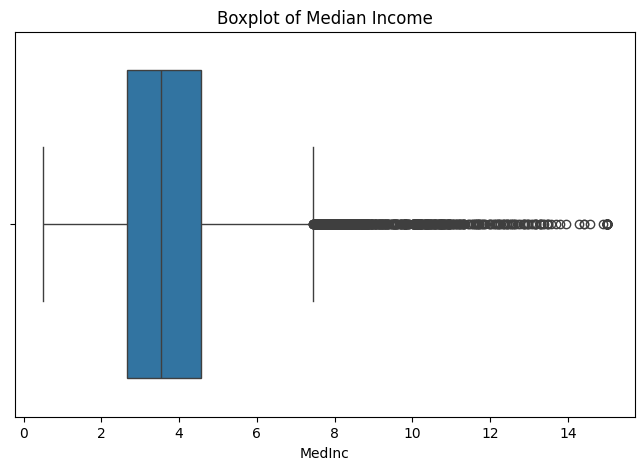

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['MedInc'])
plt.title("Boxplot of Median Income")
plt.show()

In [18]:
z_scores = np.abs(stats.zscore(df['MedInc'],nan_policy='omit'))
outliers = df[z_scores > 3]

In [20]:
Q1 = df['MedInc'].quantile(0.25)
Q3 = df['MedInc'].quantile(0.75)
IQR = Q3 - Q1
outliers2 = df[(df['MedInc'] < (Q1 - 1.5 * IQR)) | (df['MedInc'] > (Q3 + 1.5 * IQR))]